# Mie Theory + Thermoplasmonics Calculator

In [1]:
import math
import numpy as npy
import EMfields as em
import RefractiveIndex as ri
import matplotlib.pyplot as plt
import opticalCrossSection as ocs

### Step 1: Parameter setting (manual)

In [2]:
# Definição dos parâmetros de análise e importação dos parâmetros materiais

## Se a NP for uma nanoesfera, shell_material equivale ao material da esfera
shell_material = 'Au'                                    
core_material = 'Water'
medium_material = 'Water'

## Se True, é nanocasca. Se False, é nanoesfera
isShell = True

## Raio da da nanoesfera ou núcleo (nm)
a = 30

## Espessura da casca (nm)
t = 7

## Raio da nanocasca (nm)
if isShell:
    b = a + t
else:
    b = a

## Início da região de exibição no plot
lambda_min = 400                                         

## Fim da região de exibição no plot
lambda_max = 1100

## Incluir correção de drude?
drude = False

### Step 2: Cross-section calculation (auto)

In [3]:
wl, N, N1, N2, mu1, mu2 = ri.setupRI(shell_material,core_material,medium_material,
                                     a,b,lambda_min,lambda_max,isShell,drude,0)

In [4]:
if isShell:
    Csca, Cext, Cabs, Cbck = ocs.shellCS(wl*(1e9),N1,N2,N,mu1,mu2,a,b)
else:
    Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,a)

In [5]:
wl = npy.delete(wl,len(wl)-1)
Csca = npy.delete(Csca,len(Csca)-1)
Cext = npy.delete(Cext,len(Cext)-1)
Cabs = npy.delete(Cabs,len(Cabs)-1)
Cbck = npy.delete(Cbck,len(Cbck)-1)

In [6]:
#path = "C:\\Users\\Ouvidoria\\Desktop\\Backup para prioritário\\Espectros Esferas\\"

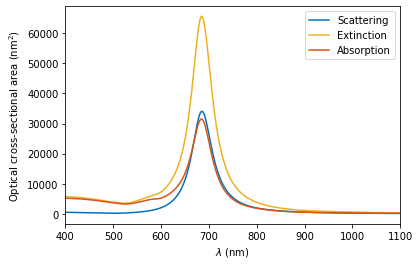

In [7]:
fig1 = plt.figure(1)
ax1 = plt.gca()
#lines1 = plt.plot((1e9)*wl,Csca,'r-',(1e9)*wl,Cext,'y-',(1e9)*wl,Cabs,'b-',(1e9)*wl,Cbck,'olivedrab',markersize=4)
#plt.legend(lines1[:4], ['Scattering','Extinction','Absorption','Backscattering']);
lines1 = plt.plot((1e9)*wl,Csca,'#0072BD',(1e9)*wl,Cext,'#EDB120',(1e9)*wl,Cabs,'#D95319',markersize=4)
plt.legend(lines1[:3], ['Scattering','Extinction','Absorption'], loc=0);
plt.ylabel('Optical cross-sectional area (nm$^{2}$)')
plt.xlabel('$\lambda$ (nm)')
ax1.set_xlim([400,1100])
#ax1.set_xlim([400,800])
#plt.savefig(path+str(a)+'.png',dpi=300,format='png')
plt.show()

### Step 3: Near-field and Heat power density calculation (auto)

def contorno(radius,size):
    ang = npy.linspace(0,2*math.pi,num=size,endpoint=True)
    contourn = npy.ones([size,size])*radius
    return ang, contourn

wl_anl = 532
r = npy.linspace(a/10,2*b,num=50,endpoint=True)
theta = npy.linspace(0,2*math.pi,num=76,endpoint=True)

E, H, q = em.yzEM(r,theta,shell_material,core_material,medium_material,a,b,wl_anl,isShell,drude)

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111,polar=True)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(False)
pc2 = ax2.pcolormesh(theta,r,E,cmap='inferno')
ax2.set_title("$\\left|E/E_{0}\\right\|$\n$(\\lambda = $"+str(int(wl_anl))+" nm)", va='bottom')
fig2.colorbar(pc2)
ang1, contourn1 = contorno(a,72)
ang2, contourn2 = contorno(b,72)
ax2.plot(ang1,contourn1,'k-',ang2,contourn2,'k-',linewidth=0.01);

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111,polar=True)
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.grid(False)
pc3 = ax3.pcolormesh(theta,r,q,cmap='afmhot')
ax3.set_title("Heat power density $(W/m^{3})$\n$(\\lambda = $"+str(int(wl_anl))+" nm)", va='bottom')
fig3.colorbar(pc3)

### Step 4: Export data

In [8]:
npy.where(Cext == Cext.max())

(array([170], dtype=int64),)

In [9]:
wl[151]

6.288250417362271e-07

In [10]:
4*math.pi*(30**3 - 23**3)/3

62132.32510759653

In [11]:
4*math.pi*(5**3)/3 + math.pi*(5**2)*30

2879.7932657906435